<a href="https://colab.research.google.com/github/shreeganeshasharma/ParticleSimulations/blob/main/ShearCycles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Random organization in periodically driven systems](https://https://www.nature.com/articles/nphys891/#Sec3)

Author : Shree Ganesha Sharma M S

Date : July 20th 2023

# Initial configuration

In [25]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

#Set a seed for random number generation
np.random.seed(1402)

#Box coordinates
x_low = 0
y_low = 0
x_high = 1
y_high = 1
#Area of square
A = (y_high - y_low)*(x_high - x_low)

#Area fraction
phi = 0.2
#Number of particles
N = 1000

#diameter of a particle
d = np.sqrt(A * phi / (N * np.pi / 4))

#Number of shear cycles
#Most methods converge in 200 steps except for the third method.
"""TODO - Code is run for larger Ncycles on another machine and plotted here"""
Ncycles = 200

#Initialize the box
#List of N particle centers
init = []

#Add a particle to the box
init.append(np.random.uniform(low = [x_low, y_low], high = [x_high, y_high]))

#Add N-1 particles in random such that none of them overlap
while len(init) < N:
  new_particle = np.random.uniform(low = [x_low, y_low], high = [x_high, y_high])
  if all(np.linalg.norm(new_particle - init, axis=1) > d) == True:
    init.append(new_particle)

init = np.array(init)

# Method 0


* Displace an active particle **as many times** as it collides.
*   Displacement is done without worrying about other particles, all particles are diaplced at once
*   No collision resolutions, if the displacement makes an inactive particle active or collides with another active particle



In [26]:
#shear amplitude
gamma0 = 2

#Proportion of active particles in each shear cycle
fa1 = np.zeros(Ncycles)

#Array of initial positions and when when sheared, initialize to no shear
particles = np.copy(init)
sheared = np.copy(init)

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles
"""TODO - use modulus for periodic boundary conditions - Done"""

for i in range(1, Ncycles):
  #print(i)
  #Array of activity of particles - how many other particles one collides with
  #activity = 0 -> inactive particle, no collision - initially all are inactive
  activity = np.zeros(N, int)

  sheared = np.array([[(particle[0] + particle[1]/gamma0)%x_high, particle[1]] for particle in particles])

  #Check if a particle collides with any other upon shear
  #activity = n > 0 -> active particle, collides with n other particles
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      activity[p] = sum(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d)
      #Instead of count/sum can store index of all encounters of a particle - just delete sum

  #Update fraction of active particles in a cycle
  fa1[i] = len(np.nonzero(activity)[0])/N

  #Revert to original positions and random displacement of active particles as many times as they collide with others
  for p in np.nonzero(activity)[0]:
    l, theta = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
    new_particle = [particles[p][0] + l * np.cos(theta), particles[p][1] + l * np.sin(theta)]
    particles[p] = new_particle
"""Does it matter if we randomly displace a particle n times or just once?"""
#Make activity an array of arrays and append the index of all colliding particles to it
#Use any and get positions of collisions

'Does it matter if we randomly displace a particle n times or just once?'

In [27]:
#shear amplitude
gamma0 = 3

#Proportion of active particles in each shear cycle
fa2 = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
particles = np.copy(init)
sheared = np.copy(init)

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles

for i in range(1, Ncycles):
  #print(i)
  #Array of activity of particles - how many other particles one collides with
  #activity = 0 -> inactive particle, no collision - initially all are inactive
  activity = np.zeros(N, int)

  sheared = np.array([[(particle[0] + particle[1]/gamma0)%x_high, particle[1]] for particle in particles])

  #Check if a particle collides with any other upon shear
  #activity = n > 0 -> active particle, collides with n other particles
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      activity[p] = sum(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d)
      #Instead of count/sum can store index of all encounters of a particle - just delete sum

  #Update fraction of active particles in a cycle
  fa2[i] = len(np.nonzero(activity)[0])/N

  #Revert to original positions and random displacement of active particles as many times as they collide with others
  for p in np.nonzero(activity)[0]:
    l, theta = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
    new_particle = [particles[p][0] + l * np.cos(theta), particles[p][1] + l * np.sin(theta)]
    particles[p] = new_particle

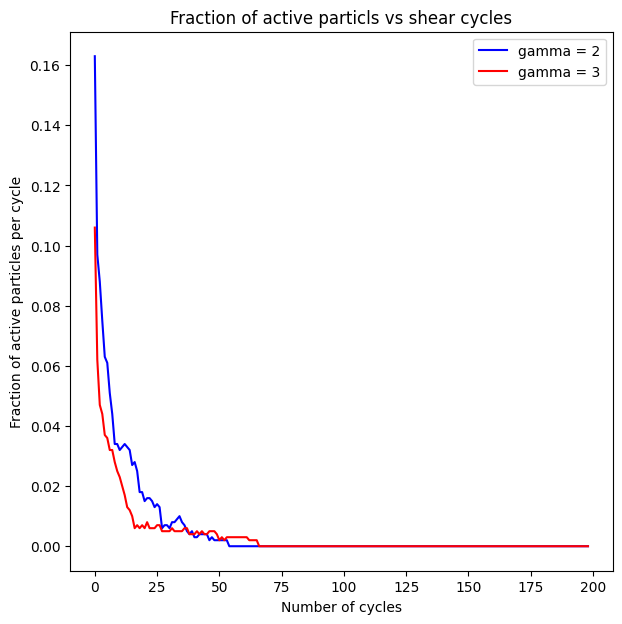

In [28]:
#Plot the fraction of active particles
plt.figure(figsize=(7, 7))
plt.title("Fraction of active particls vs shear cycles")
plt.plot(fa1[1:], 'b', label="gamma = 2")
plt.plot(fa2[1:], 'r', label="gamma = 3")
plt.ylabel("Fraction of active particles per cycle")
plt.xlabel("Number of cycles")
plt.legend()
plt.show()

# Method 0.1

* Displace any active particle **once**.
*   Displacement is done without worrying about other particles, all particles are diaplced at once
*   No collision resolutions, if the displacement makes an inactive particle active or collides with another active particle
* Displacing a particle n times is equivalent to displacing it once. The *distribution will change*, but it's still random


In [29]:
#shear amplitude
gamma0 = 2

#Proportion of active particles in each shear cycle
fa1 = np.zeros(Ncycles)

#Array of initial positions and when when sheared, initialize to no shear
particles = np.copy(init)
sheared = np.copy(init)

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles


for i in range(1, Ncycles):
  #print(i)
  #Array of activity of particles - how many other particles one collides with
  #activity = 0 -> inactive particle, no collision - initially all are inactive
  activity = np.zeros(N, int)

  sheared = np.array([[(particle[0] + particle[1]/gamma0)%x_high, particle[1]] for particle in particles])

  #Check if a particle collides with any other upon shear
  #activity = 1 -> active particle
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      activity[p] = sum(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d)
      #Instead of count/sum can store index of all encounters of a particle - just delete sum

  #Update fraction of active particles in a cycle
  fa1[i] = len(np.nonzero(activity)[0])/N

  #print(activity)
  #print(np.nonzero(activity)[0])

  #Revert to original positions and random displacement of active particles as many times as they collide with others
  for p in np.nonzero(activity)[0]:
    for i in range(activity[p]):
      l, theta = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      new_particle = [particles[p][0] + l * np.cos(theta), particles[p][1] + l * np.sin(theta)]
      particles[p] = new_particle
"""Does it matter if we randomly displace a particle n times or just once?"""
#Make activity an array of arrays and append the index of all colliding particles to it
#Use any and get positions of collisions

'Does it matter if we randomly displace a particle n times or just once?'

In [30]:
#shear amplitude
gamma0 = 3

#Proportion of active particles in each shear cycle
fa2 = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
particles = np.copy(init)
sheared = np.copy(init)

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles

for i in range(1, Ncycles):
  #print(i)
  #Array of activity of particles - how many other particles one collides with
  #activity = 0 -> inactive particle, no collision - initially all are inactive
  activity = np.zeros(N, int)

  sheared = np.array([[(particle[0] + particle[1]/gamma0)%x_high, particle[1]] for particle in particles])

  #Check if a particle collides with any other upon shear
  #activity = n > 0 -> active particle, collides with n other particles
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      activity[p] = sum(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d)
      #Instead of count/sum can store index of all encounters of a particle - just delete sum

  #Update fraction of active particles in a cycle
  fa2[i] = len(np.nonzero(activity)[0])/N

  #Revert to original positions and random displacement of active particles as many times as they collide with others
  for p in np.nonzero(activity)[0]:
    for i in range(activity[p]):
      l, theta = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      new_particle = [particles[p][0] + l * np.cos(theta), particles[p][1] + l * np.sin(theta)]
      particles[p] = new_particle

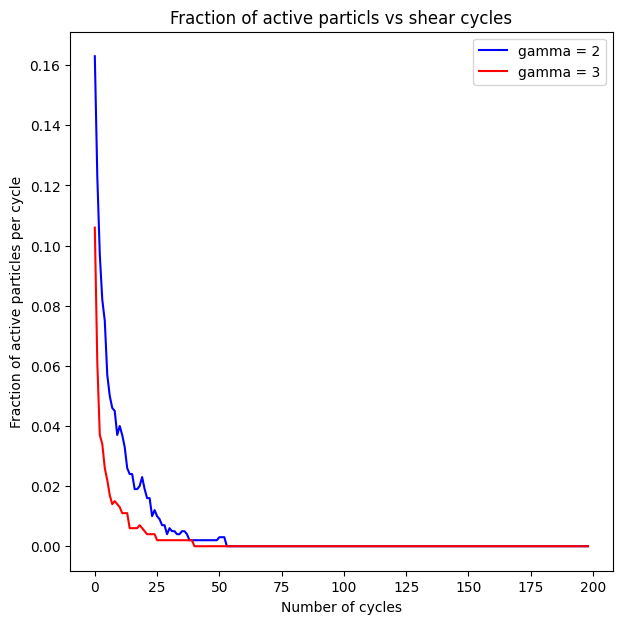

In [31]:
#Plot the fraction of active particles
plt.figure(figsize=(7, 7))
plt.title("Fraction of active particls vs shear cycles")
plt.plot(fa1[1:], 'b', label="gamma = 2")
plt.plot(fa2[1:], 'r', label="gamma = 3")
plt.ylabel("Fraction of active particles per cycle")
plt.xlabel("Number of cycles")
plt.legend()
plt.show()

# Method 1
* Shear cycles with colliding pairs displaced by the **different** random numbers.
* The displacement might increase or decrease the distance between the pair.
* No clash resolutions, if any particle collides with any other particle.
* Figure1 of the paper shows that particles are displaced by different random numbers and nothing about clash resolution is mentioned

In [32]:
#shear amplitude
gamma0 = 2

#Proportion of active particles in each shear cycle
fa1 = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
particles = np.copy(init)
sheared = np.copy(init)

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles

for i in range(Ncycles):
  #print(i)
  #Dictionary of active particles - list of indices of all other particles that collide with pth particle
  activity = {}

  #Find sheared positions
  #Use periodic boundary conditions -
  #"The box doesn't move - the particles move out of the square boundary under consideration and return to the other end!" - prof. Anki
  sheared = np.array([[(particle[0] + particle[1]/gamma0)%x_high, particle[1]] for particle in particles])

  #Check upon shear if a particle collides with any other
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      #Get indices of all particles the pth particle is colliding with, except for the present particle
      #print(p, np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0])
      activity[p] = np.delete(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0], np.where(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0] == p))
      #Type cast to list as removal of list element is easier, can be done by value, whereas np array requies

  #Update fraction of active particles in a cycle
  fa1[i] = len(activity)/N

  #Revert to original positions and Random displacement of active particles in pairs
  for index1 in activity.keys():
    index2 = activity[index1]
    #print(index1, index2)
    while index2.size > 0:
      #print(index2)
      #First encountered particle - first in the list of indices of ith particle
      #Common random displacement for every pair of collision - won't work
      #Two active particles will remain active if I displace both of them by the same random number, the pair itlself is just translated
      l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
      l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])
      particles[index1] += displacement1
      particles[index2[0]] += displacement2

      #The encountered particle also has the present particle in its encounters - In the dictionary, remove the present key from present values's value
      activity[index2[0]] = np.delete(activity[index2[0]], np.where(activity[index2[0]] == index1)[0][0], axis = 0)

      #Particle1 might collide with many particles - Remove the first encountered particle in its list
      index2 = np.delete(index2, 0, axis = 0)

In [33]:
#shear amplitude
gamma0 = 3

#Proportion of active particles in each shear cycle
fa2 = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
particles = np.copy(init)
sheared = np.copy(init)

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles

for i in range(Ncycles):
  #print(i)
  #Dictionary of active particles - list of indices of all other particles that collide with pth particle
  activity = {}

  #Find sheared positions
  #Use periodic boundary conditions -
  #"The box doesn't move - the particles move out of the square boundary under consideration and return to the other end!" - prof. Anki
  sheared = np.array([[(particle[0] + particle[1]/gamma0)%x_high, particle[1]] for particle in particles])

  #Check upon shear if a particle collides with any other
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      #Get indices of all particles the pth particle is colliding with, except for the present particle
      #print(p, np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0])
      activity[p] = np.delete(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0], np.where(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0] == p))
      #Type cast to list as removal of list element is easier, can be done by value, whereas np array requies

  #Update fraction of active particles in a cycle
  fa2[i] = len(activity)/N

  #Revert to original positions and Random displacement of active particles in pairs
  for index1 in activity.keys():
    index2 = activity[index1]
    #print(index1, index2)
    while index2.size > 0:
      #print(index2)
      #First encountered particle - first in the list of indices of ith particle
      #Common random displacement for every pair of collision - won't work
      #Two active particles will remain active if I displace both of them by the same random number, the pair itlself is just translated
      l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
      l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])
      particles[index1] += displacement1
      particles[index2[0]] += displacement2

      #The encountered particle also has the present particle in its encounters - In the dictionary, remove the present key from present values's value
      activity[index2[0]] = np.delete(activity[index2[0]], np.where(activity[index2[0]] == index1)[0][0], axis = 0)

      #Particle1 might collide with many particles - Remove the first encountered particle in its list
      index2 = np.delete(index2, 0, axis = 0)

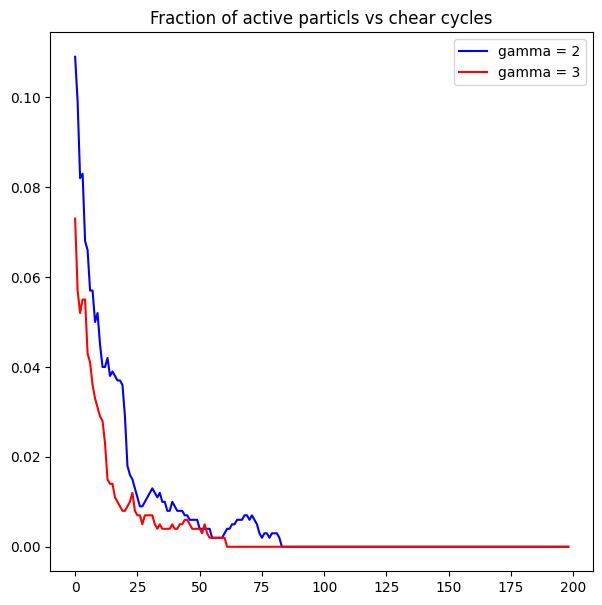

In [34]:
#Plot the fraction of active particles
plt.figure(figsize=(7, 7))
plt.title("Fraction of active particls vs chear cycles")
plt.plot(fa1[1:], 'b', label="gamma = 2")
plt.plot(fa2[1:], 'r', label="gamma = 3")
plt.legend()
plt.show()

# Method 2

* Displacements are done in pairs that collide with one another.
* Replaces a particle as many times as it collides, one by one, but paired with the particle it encounters.
* As a random displacement can bring colliding pair closer to each other, or leave them colliding, a suitable random displacement that separates an active pair is dound.
* The displacement can take a particle closer to another active/inactive particle.

In [35]:
#shear amplitude
gamma0 = 2

#Proportion of active particles in each shear cycle
fa2 = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
particles = np.copy(init)
sheared = np.copy(init)

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles

for i in range(Ncycles):
  #print(i)
  #Dictionary of active particles - list of indices of all other particles that collide with pth particle
  activity = {}

  #Find sheared positions
  #Use periodic boundary conditions -
  #"The box doesn't move - the particles move out of the square boundary under consideration and return to the other end!" - prof. Anki
  sheared = np.array([[(particle[0] + particle[1]/gamma0)%x_high, particle[1]] for particle in particles])

  #Check upon shear if a particle collides with any other
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      #Get indices of all particles the pth particle is colliding with, except for the present particle
      #print(p, np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0])
      activity[p] = np.delete(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0], np.where(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0] == p))
      #Type cast to list as removal of list element is easier, can be done by value, whereas np array requies

  #Update fraction of active particles in a cycle
  fa2[i] = len(activity)/N

  #Revert to original positions and Random displacement of active particles in pairs
  for index1 in activity.keys():
    index2 = activity[index1]
    #print(index1, index2)
    while index2.size > 0:
      #print(index2)
      #First encountered particle - first in the list of indices of ith particle
      #Common random displacement for every pair of collision - won't work
      #Two active particles will remain active if I displace both of them by the same random number, the pair itlself is just translated
      l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
      l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])

      #If the pair collides due to displacement, find displace it by a different random number until clash with the pair is resolved
      dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))
      #The pair might collide due to random displacement in the initial configuration itself
      #So find a random displacemnt until clash is resolved
      while dist <= d/2:
        l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
        l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])
        dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))

      particles[index1] += displacement1
      particles[index2[0]] += displacement2

      #The encountered particle also has the present particle in its encounters - In the dictionary, remove the present key from present values's value
      activity[index2[0]] = np.delete(activity[index2[0]], np.where(activity[index2[0]] == index1)[0][0], axis = 0)

      #Particle1 might collide with many particles - Remove the first encountered particle in its list
      index2 = np.delete(index2, 0, axis = 0)

In [36]:
#shear amplitude
gamma0 = 3

#Proportion of active particles in each shear cycle
fa2 = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
particles = np.copy(init)
sheared = np.copy(init)

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles

for i in range(Ncycles):
  #print(i)
  #Dictionary of active particles - list of indices of all other particles that collide with pth particle
  activity = {}

  #Find sheared positions
  #Use periodic boundary conditions -
  #"The box doesn't move - the particles move out of the square boundary under consideration and return to the other end!" - prof. Anki
  sheared = np.array([[(particle[0] + particle[1]/gamma0)%x_high, particle[1]] for particle in particles])

  #Check upon shear if a particle collides with any other
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      #Get indices of all particles the pth particle is colliding with, except for the present particle
      #print(p, np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0])
      activity[p] = np.delete(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0], np.where(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0] == p))
      #Type cast to list as removal of list element is easier, can be done by value, whereas np array requies

  #Update fraction of active particles in a cycle
  fa2[i] = len(activity)/N

  #Revert to original positions and Random displacement of active particles in pairs
  for index1 in activity.keys():
    index2 = activity[index1]
    #print(index1, index2)
    while index2.size > 0:
      #print(index2)
      #First encountered particle - first in the list of indices of ith particle
      #Common random displacement for every pair of collision - won't work
      #Two active particles will remain active if I displace both of them by the same random number, the pair itlself is just translated
      l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
      l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])

      #If the pair collides due to displacement, find displace it by a different random number until clash with the pair is resolved
      dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))
      #The pair might collide due to random displacement in the initial configuration itself
      #So find a random displacemnt until clash is resolved
      while dist <= d/2:
        l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
        l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])
        dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))

      particles[index1] += displacement1
      particles[index2[0]] += displacement2

      #The encountered particle also has the present particle in its encounters - In the dictionary, remove the present key from present values's value
      activity[index2[0]] = np.delete(activity[index2[0]], np.where(activity[index2[0]] == index1)[0][0], axis = 0)

      #Particle1 might collide with many particles - Remove the first encountered particle in its list
      index2 = np.delete(index2, 0, axis = 0)

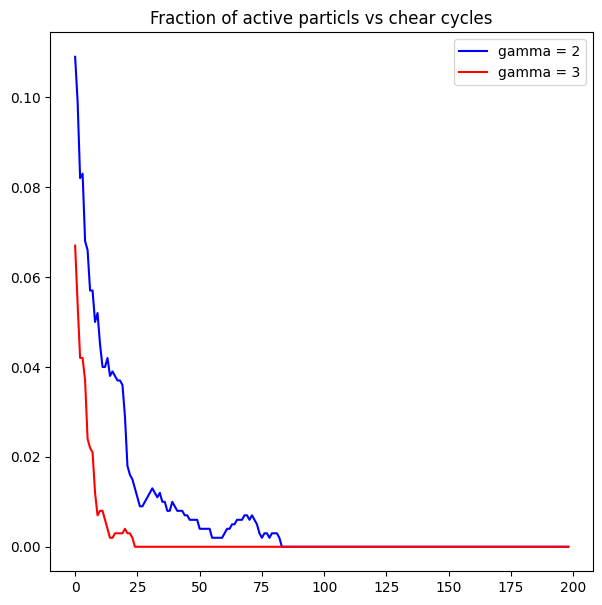

In [37]:
#Plot the fraction of active particles
plt.figure(figsize=(7, 7))
plt.title("Fraction of active particls vs chear cycles")
plt.plot(fa1[1:], 'b', label="gamma = 2")
plt.plot(fa2[1:], 'r', label="gamma = 3")
plt.legend()
plt.show()

# Method 3
* Displace an active **pair** by the **SAME** random number, like a dumbbell.
* This produces results that look close to the ones in the paper.
* Agnostic to whether a particle in the pair collides with the remaining particles.

In [46]:
#shear amplitude
gamma0 = 2

#Proportion of active particles in each shear cycle
fa2 = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
particles = np.copy(init)
sheared = np.copy(init)

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles

for i in range(Ncycles):
  #print(i)
  #Dictionary of active particles - list of indices of all other particles that collide with pth particle
  activity = {}

  #Find sheared positions
  #Use periodic boundary conditions -
  #"The box doesn't move - the particles move out of the square boundary under consideration and return to the other end!" - prof. Anki
  sheared = np.array([[(particle[0] + particle[1]/gamma0)%x_high, particle[1]] for particle in particles])

  #Check upon shear if a particle collides with any other
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      #Get indices of all particles the pth particle is colliding with, except for the present particle
      #print(p, np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0])
      activity[p] = np.delete(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0], np.where(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0] == p))
      #Type cast to list as removal of list element is easier, can be done by value, whereas np array requies

  #Update fraction of active particles in a cycle
  fa2[i] = len(activity)/N

  #Revert to original positions and Random displacement of active particles in pairs
  for index1 in activity.keys():
    index2 = activity[index1]
    #print(index1, index2)
    while index2.size > 0:
      #print(index2)
      #First encountered particle - first in the list of indices of ith particle
      #Common random displacement for every pair of collision - won't work
      #Two active particles will remain active if I displace both of them by the same random number, the pair itlself is just translated
      l, theta = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
      """
      #If the pair collides due to displacement, find displace it by a different random number until clash with the pair is resolved
      dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))
      #The pair might collide due to random displacement in the initial configuration itself
      #So find a random displacemnt until clash is resolved
      while dist <= d/2:
        l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
        l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])
        dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))
      """
      particles[index1] += displacement
      particles[index2[0]] += displacement

      #The encountered particle also has the present particle in its encounters - In the dictionary, remove the present key from present values's value
      activity[index2[0]] = np.delete(activity[index2[0]], np.where(activity[index2[0]] == index1)[0][0], axis = 0)

      #Particle1 might collide with many particles - Remove the first encountered particle in its list
      index2 = np.delete(index2, 0, axis = 0)

In [47]:
#shear amplitude
gamma0 = 3

#Proportion of active particles in each shear cycle
fa2 = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
particles = np.copy(init)
sheared = np.copy(init)

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles

for i in range(Ncycles):
  #print(i)
  #Dictionary of active particles - list of indices of all other particles that collide with pth particle
  activity = {}

  #Find sheared positions
  #Use periodic boundary conditions -
  #"The box doesn't move - the particles move out of the square boundary under consideration and return to the other end!" - prof. Anki
  sheared = np.array([[(particle[0] + particle[1]/gamma0)%x_high, particle[1]] for particle in particles])

  #Check upon shear if a particle collides with any other
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      #Get indices of all particles the pth particle is colliding with, except for the present particle
      #print(p, np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0])
      activity[p] = np.delete(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0], np.where(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0] == p))
      #Type cast to list as removal of list element is easier, can be done by value, whereas np array requies

  #Update fraction of active particles in a cycle
  fa2[i] = len(activity)/N

  #Revert to original positions and Random displacement of active particles in pairs
  for index1 in activity.keys():
    index2 = activity[index1]
    #print(index1, index2)
    while index2.size > 0:
      #print(index2)
      #First encountered particle - first in the list of indices of ith particle
      #Common random displacement for every pair of collision - won't work
      #Two active particles will remain active if I displace both of them by the same random number, the pair itlself is just translated
      l, theta = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
      """
      l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])

      #If the pair collides due to displacement, find displace it by a different random number until clash with the pair is resolved
      dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))
      #The pair might collide due to random displacement in the initial configuration itself
      #So find a random displacemnt until clash is resolved
      while dist <= d/2:
        l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
        l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])
        dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))
      """
      particles[index1] += displacement
      particles[index2[0]] += displacement

      #The encountered particle also has the present particle in its encounters - In the dictionary, remove the present key from present values's value
      activity[index2[0]] = np.delete(activity[index2[0]], np.where(activity[index2[0]] == index1)[0][0], axis = 0)

      #Particle1 might collide with many particles - Remove the first encountered particle in its list
      index2 = np.delete(index2, 0, axis = 0)

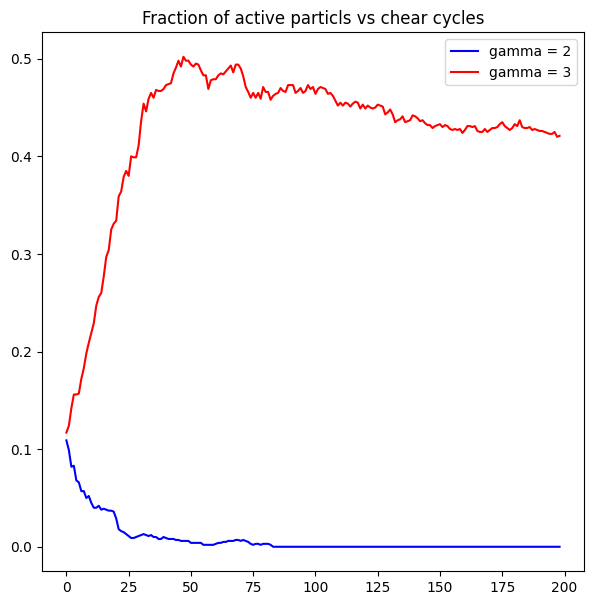

In [48]:
#Plot the fraction of active particles
plt.figure(figsize=(7, 7))
plt.title("Fraction of active particls vs chear cycles")
plt.plot(fa1[1:], 'b', label="gamma = 2")
plt.plot(fa2[1:], 'r', label="gamma = 3")
plt.legend()
plt.show()

# Method 4
* An active particle is displaced by a random number such that it doesn't collide with its pair/partner in the last cycle.
* The new position should not collide with any other inactive particle.
* Displacements are done in pairs.
* Expected to take a long time.

**Template ONLY, To be done**

In [41]:
#shear amplitude
gamma0 = 2

#Proportion of active particles in each shear cycle
fa2 = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
particles = np.copy(init)
sheared = np.copy(init)

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles

for i in range(Ncycles):
  #print(i)
  #Dictionary of active particles - list of indices of all other particles that collide with pth particle
  activity = {}

  #Find sheared positions
  #Use periodic boundary conditions -
  #"The box doesn't move - the particles move out of the square boundary under consideration and return to the other end!" - prof. Anki
  sheared = np.array([[(particle[0] + particle[1]/gamma0)%x_high, particle[1]] for particle in particles])

  #Check upon shear if a particle collides with any other
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      #Get indices of all particles the pth particle is colliding with, except for the present particle
      #print(p, np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0])
      activity[p] = np.delete(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0], np.where(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0] == p))
      #Type cast to list as removal of list element is easier, can be done by value, whereas np array requies

  #Update fraction of active particles in a cycle
  fa2[i] = len(activity)/N

  #Revert to original positions and Random displacement of active particles in pairs
  for index1 in activity.keys():
    index2 = activity[index1]
    #print(index1, index2)
    while index2.size > 0:
      #print(index2)
      #First encountered particle - first in the list of indices of ith particle
      #Common random displacement for every pair of collision - won't work
      #Two active particles will remain active if I displace both of them by the same random number, the pair itlself is just translated
      l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
      l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])

      #If the pair collides due to displacement, find displace it by a different random number until clash with the pair is resolved
      dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))
      #The pair might collide due to random displacement in the initial configuration itself
      #So find a random displacemnt until clash is resolved
      while dist <= d/2:
        l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
        l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])
        dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))

      particles[index1] += displacement1
      particles[index2[0]] += displacement2

      #The encountered particle also has the present particle in its encounters - In the dictionary, remove the present key from present values's value
      activity[index2[0]] = np.delete(activity[index2[0]], np.where(activity[index2[0]] == index1)[0][0], axis = 0)

      #Particle1 might collide with many particles - Remove the first encountered particle in its list
      index2 = np.delete(index2, 0, axis = 0)

In [42]:
#shear amplitude
gamma0 = 3

#Proportion of active particles in each shear cycle
fa2 = np.zeros(Ncycles)

#An array of positions when sheared, initialize to no shear
particles = np.copy(init)
sheared = np.copy(init)

#Do shear cycles and random organization until there are no more active particles - works if gamma0 < gammaCritical
#For gamma0 > gammaCritical, do for a large number of cycles

for i in range(Ncycles):
  #print(i)
  #Dictionary of active particles - list of indices of all other particles that collide with pth particle
  activity = {}

  #Find sheared positions
  #Use periodic boundary conditions -
  #"The box doesn't move - the particles move out of the square boundary under consideration and return to the other end!" - prof. Anki
  sheared = np.array([[(particle[0] + particle[1]/gamma0)%x_high, particle[1]] for particle in particles])

  #Check upon shear if a particle collides with any other
  for p in range(N):
    if any(np.linalg.norm(sheared[p] - np.delete(sheared, p, axis = 0), axis=1) <= d) == True:
      #Get indices of all particles the pth particle is colliding with, except for the present particle
      #print(p, np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0])
      activity[p] = np.delete(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0], np.where(np.nonzero(np.linalg.norm(sheared[p] - sheared, axis=1) <= d)[0] == p))
      #Type cast to list as removal of list element is easier, can be done by value, whereas np array requies

  #Update fraction of active particles in a cycle
  fa2[i] = len(activity)/N

  #Revert to original positions and Random displacement of active particles in pairs
  for index1 in activity.keys():
    index2 = activity[index1]
    #print(index1, index2)
    while index2.size > 0:
      #print(index2)
      #First encountered particle - first in the list of indices of ith particle
      #Common random displacement for every pair of collision - won't work
      #Two active particles will remain active if I displace both of them by the same random number, the pair itlself is just translated
      l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
      l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])

      #If the pair collides due to displacement, find displace it by a different random number until clash with the pair is resolved
      dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))
      #The pair might collide due to random displacement in the initial configuration itself
      #So find a random displacemnt until clash is resolved
      while dist <= d/2:
        l1, theta1 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement1 = np.array([l1 * np.cos(theta1), l1 * np.sin(theta1)])
        l2, theta2 = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
        displacement2 = np.array([l2 * np.cos(theta2), l1 * np.sin(theta2)])
        dist = np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))

      particles[index1] += displacement1
      particles[index2[0]] += displacement2

      #The encountered particle also has the present particle in its encounters - In the dictionary, remove the present key from present values's value
      activity[index2[0]] = np.delete(activity[index2[0]], np.where(activity[index2[0]] == index1)[0][0], axis = 0)

      #Particle1 might collide with many particles - Remove the first encountered particle in its list
      index2 = np.delete(index2, 0, axis = 0)

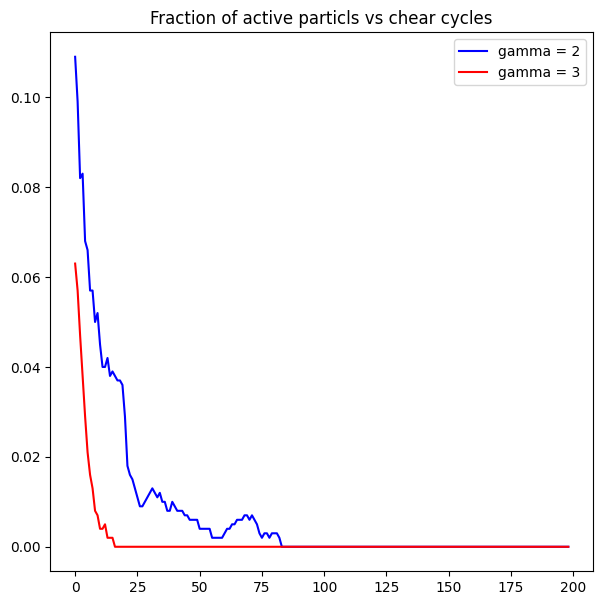

In [43]:
#Plot the fraction of active particles
plt.figure(figsize=(7, 7))
plt.title("Fraction of active particls vs chear cycles")
plt.plot(fa1[1:], 'b', label="gamma = 2")
plt.plot(fa2[1:], 'r', label="gamma = 3")
plt.legend()
plt.show()

# Misc

In [44]:
"""
#Plot initial configuration
fig,ax=plt.subplots(figsize=(7.5,7.4))
ax.set_aspect(1)
ax.set_title("Initial position of particles")
plt.xlim(x_low-0.1, x_high+0.1)
plt.ylim(y_low-0.1, y_high+0.1)

for particle in particles:
    ax.add_artist(plt.Circle((particle[0], particle[1]), d/2, color='b', fill = False))
plt.show()"""

'\n#Plot initial configuration\nfig,ax=plt.subplots(figsize=(7.5,7.4))\nax.set_aspect(1)\nax.set_title("Initial position of particles")\nplt.xlim(x_low-0.1, x_high+0.1)\nplt.ylim(y_low-0.1, y_high+0.1)\n\nfor particle in particles:\n    ax.add_artist(plt.Circle((particle[0], particle[1]), d/2, color=\'b\', fill = False))\nplt.show()'

In [45]:
print(particles[index1], particles[index2[0]])
print(displacement1, displacement2)
print((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))
np.linalg.norm((particles[index1] + displacement1) - (particles[index2[0]] + displacement2))

IndexError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fil1 = np.genfromtxt("/content/sample_data/fraction2_500.csv", delimiter = ',')
fil2 = np.genfromtxt("/content/sample_data/fraction3_500.csv", delimiter = ',')

plt.figure(figsize=(7, 7))
plt.title("Fraction of active particles v\s number of shear cycles")
plt.plot(fil1, 'b', label = "gamma = 2")
plt.plot(fil2, 'r', label = "gamma = 3")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fil = np.genfromtxt("/content/sample_data/fraction2_5000.csv", delimiter = ',')
print(fil)
plt.figure(figsize=(10, 10))
plt.xlim(0, 500)
plt.plot(fil)

In [ ]:
print(index2)

activity[index2[0]]
print(np.where(activity[index2[0]] == index1)[0][0])

In [ ]:
print(particles[index1])
print(particles[index2[0]])
print(np.linalg.norm(particles[index2[0]] - particles[index1]))
print(d)

In [ ]:
a = {1: [2, 3]}
print(a)
a[1].remove(a[1][0])
print(a)
a[1].remove(a[1][0])
print(a)
print(a[1] != [])

a = {1: np.array([2, 3])}
print(a[1][0])
print(np.delete(a[1], 0, 0))
a[1] = np.delete(a[1], 0, 0)
print(np.delete(a[1], 0, 0))
a[1] = np.delete(a[1], 0, 0)
print(a[1], a[1].size)

print(2.5%2)

In [ ]:
  for i in activity.keys():
    #current particle
    #particle1 = particles[i]
    while activity[i] != []:
      #First encountered particle - first in the list of indices of ith particle
      #particle2 = particles[activity[i][0]]
      #Common random displacement for every pair of collision
      l, theta = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement = np.array([l * np.cos(theta), l * np.sin(theta)])

      #Should I cerify that this random displacement doesn't cause collision in original configuration
      #if all(np.linalg.norm(new_particle - np.delete(particles, p, 0), axis=1) > d) == True:
      #But takes too long

      #Displace the original positions
      #particle1 += displacement
      #particle2 += displacement
      particles[i] += displacement
      particles[activity[i][0]] += displacement
      #This completes displacing a pair for a particular key

      #The encountered particle also has the present particle in its encounters - In the dictionary, remove the present key from present values's value
      np.delete(activity[activity[i][0]], np.where(activity[activity[i][0]] == i), axis = 0)

      #Particle1 might collide with many particles - Remove the first encountered particle in its list
      np.delete(activity[i], 0, axis = 0)

In [ ]:
  #Revert to original positions and,
  #Random displacement of active particles in pairs
  for i in range(len(activity)):
    #current particle
    particle1 = particles[activity.keys[i]]
    while activity[i] != []:
      #encountered particle
      particle2 = particles[activity[i]]
      #Common random displacement for every pair of collision
      l, theta = np.random.uniform(low = [0, 0], high = [d/2, 2*np.pi])
      displacement = np.array([l * np.cos(theta), l * np.sin(theta)])

      #Should I cerify that this random displacement doesn't cause collision in original configuration
      #if all(np.linalg.norm(new_particle - np.delete(particles, p, 0), axis=1) > d) == True:
      #But takes too long

      #Displace the original positions
      particle1 += displacement
      particle2 += displacement

      #The encountered particle also has the present particle in its encounters - In the dictionary, remove the present key from present values's value
      np.delete(activity[i], np.where(activity[i] == activity.keys[i]), axis = 0)

      #Particle1 might collide with many particles - Remove the first encountered particle in its list
      np.delete(activity[i], index = 0, axis = 0)

      #This completes displacing a pair

In [ ]:
a = np.array([1, 2])
b = np.array([2, 3])
a + b